<a href="https://colab.research.google.com/github/SWAGATHCHOWDARY/Sentiment-analysis-of-AMAZON-ALEXA-reviews/blob/main/SENTIMENT_ANALYSIS_OVER_THE_REVIEWS_FOR_AMAZON_ALEXA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from textblob import TextBlob
from sklearn.model_selection import train_test_split 
from textblob.classifiers import NaiveBayesClassifier

In [2]:
#loading the data
dataset = pd.read_csv(r"/content/drive/My Drive/amazon alexa reviews/amazon_alexa.tsv", sep = "\t")
dataset.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


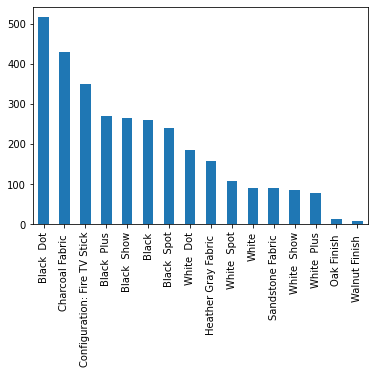

In [19]:
dataset['variation'].value_counts().plot(kind='bar')

In [3]:
#analysing the data
dataset.shape

(3150, 5)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
dataset.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [6]:
data = dataset.drop("date",axis=1)
data.head()

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1


In [7]:
#converting feedback 1 and 0 to pos and neg
data["feedback"] =np.where(data["feedback"].isin([1]), "pos", "neg")
data.head()

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,pos
1,5,Charcoal Fabric,Loved it!,pos
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",pos
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,pos
4,5,Charcoal Fabric,Music,pos


VISUALIZATION

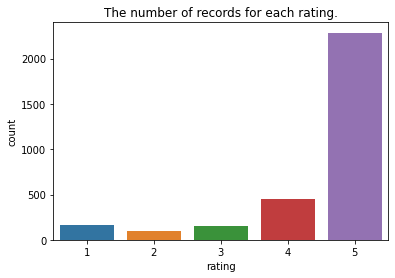

In [8]:
sns.countplot(x='rating',data=data)
plt.title("The number of records for each rating.")
plt.show()

Most of the ratings are given as "5"

In [9]:
#adding a column for sentiment polarity in our dataset
def polarity(review):
    return TextBlob(review).sentiment.polarity

data["sentiment_Polarity"] = data["verified_reviews"].apply(polarity)
data.head()

,rating,variation,verified_reviews,feedback,sentiment_Polarity
0,5,Charcoal Fabric,Love my Echo!,pos,0.625
1,5,Charcoal Fabric,Loved it!,pos,0.875
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",pos,-0.100
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,pos,0.350
4,5,Charcoal Fabric,Music,pos,0.000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


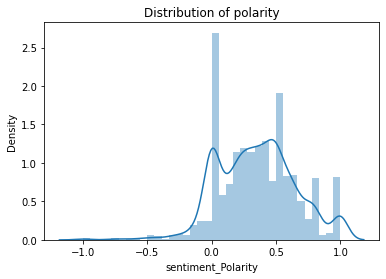

In [10]:
sns.distplot(data["sentiment_Polarity"])
plt.title("Distribution of polarity")
plt.show()

Most of the polarity lies between the scale 0.0 - 1.0

In [11]:
#most negative reviews 
most_neg = data[data.sentiment_Polarity == -1].verified_reviews.head()
print(most_neg)

661     This Echo Dot is horrible. The volume on my ph...
1340    Get rid of the &#34;Thongs To Try&#34; screen!...
1386    Invasive and scared the crap out of me for spe...
1903             Terrible. Stopped working after one day.
Name: verified_reviews, dtype: object


In [12]:
#most positive reviews
most_pos = data[data.sentiment_Polarity == 1].verified_reviews.head()
print(most_pos)

34                               This device is awesome!
75                                          It’s awesome
82     Great technology!! Can't believe the speaker v...
119         Excellent product, set up with ease as well.
173    BEST father's day gift. Dad joked to my mom th...
Name: verified_reviews, dtype: object


Building the model

In [13]:
#prepare a training and testing data.
x = data["verified_reviews"]
y = data["feedback"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=1/3)

In [14]:
train = [x for x in zip(x_train,y_train)]
test = [x for x in zip(x_test, y_test)]

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
#Now we create a Naive Bayes classifier for classification 
classifier = NaiveBayesClassifier(train)

In [27]:
# Predicting the Test set results
print(classifier.accuracy(test))

0.8942857142857142


Conclusion : Reviews for Amazon Alexa is positive.